In [2]:
!nvidia-smi

Wed Jun 14 08:25:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [11]:
!ls

data  runs  yolov8s.pt


In [12]:
%cd /content/drive/MyDrive/yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [14]:
!ls runs/detect/train2/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch120.jpg
events.out.tfevents.1686731849.509f41ff5430.4920.0  train_batch121.jpg
F1_curve.png					    train_batch122.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


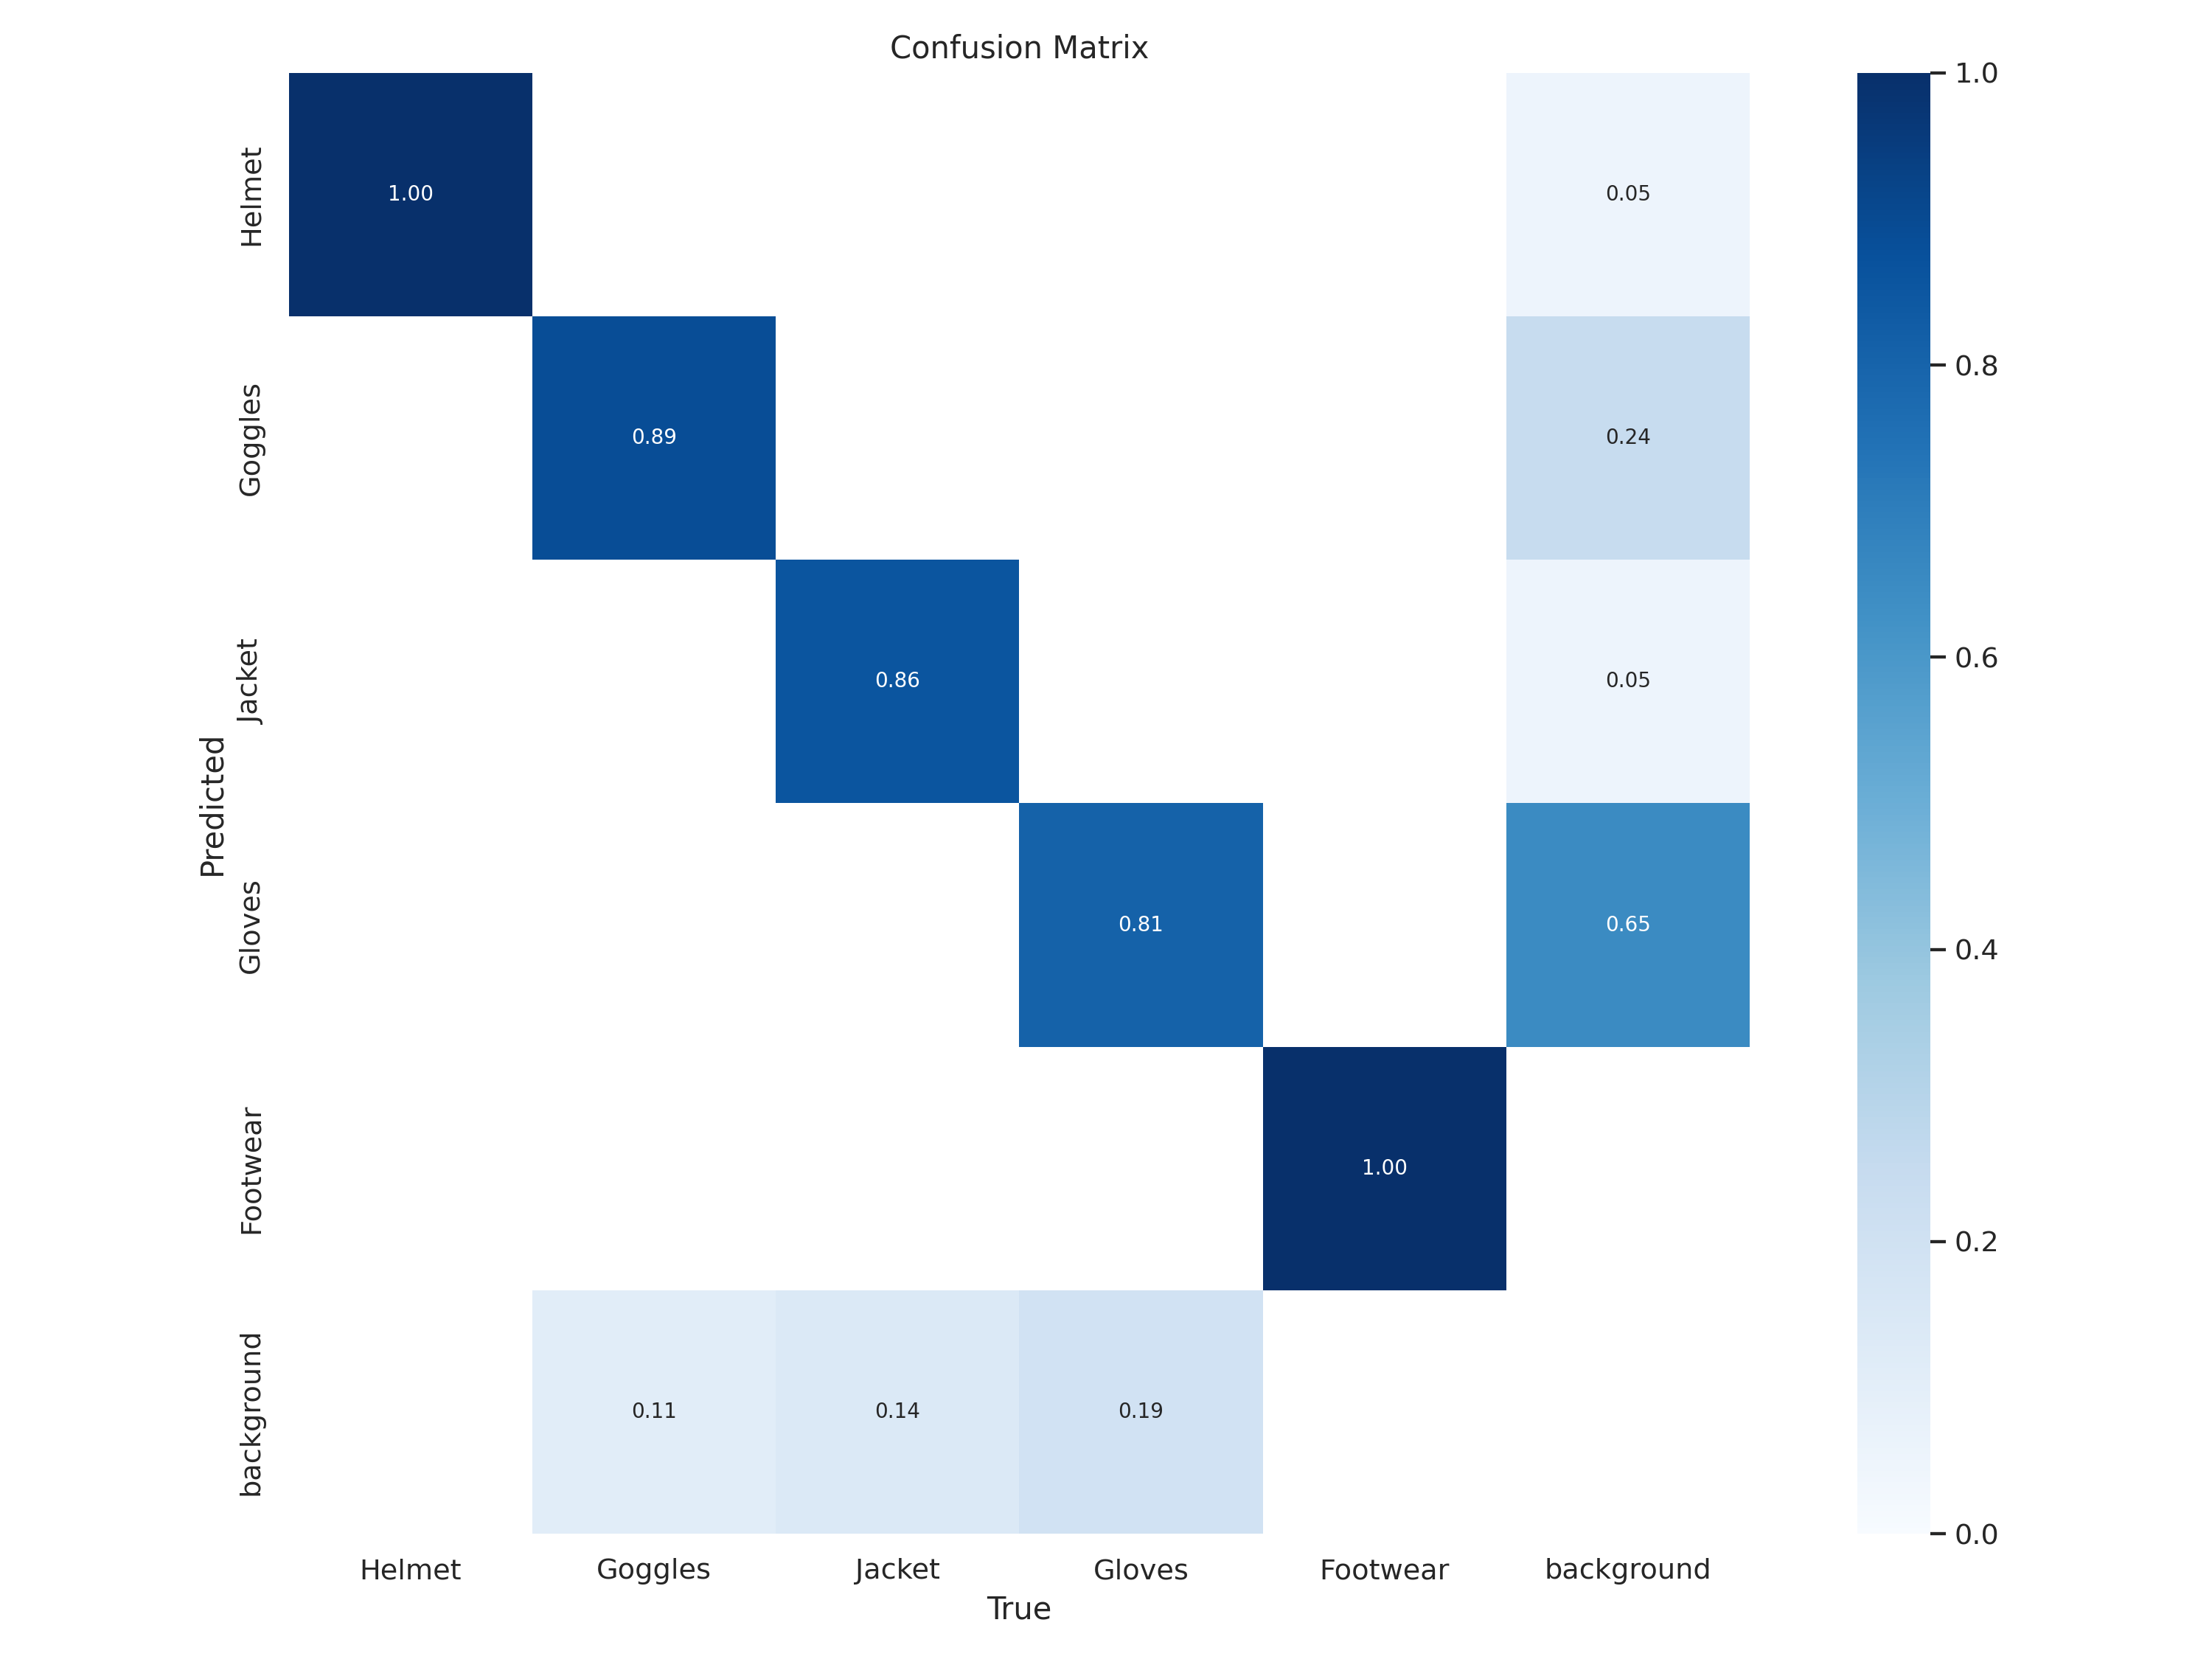

In [15]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

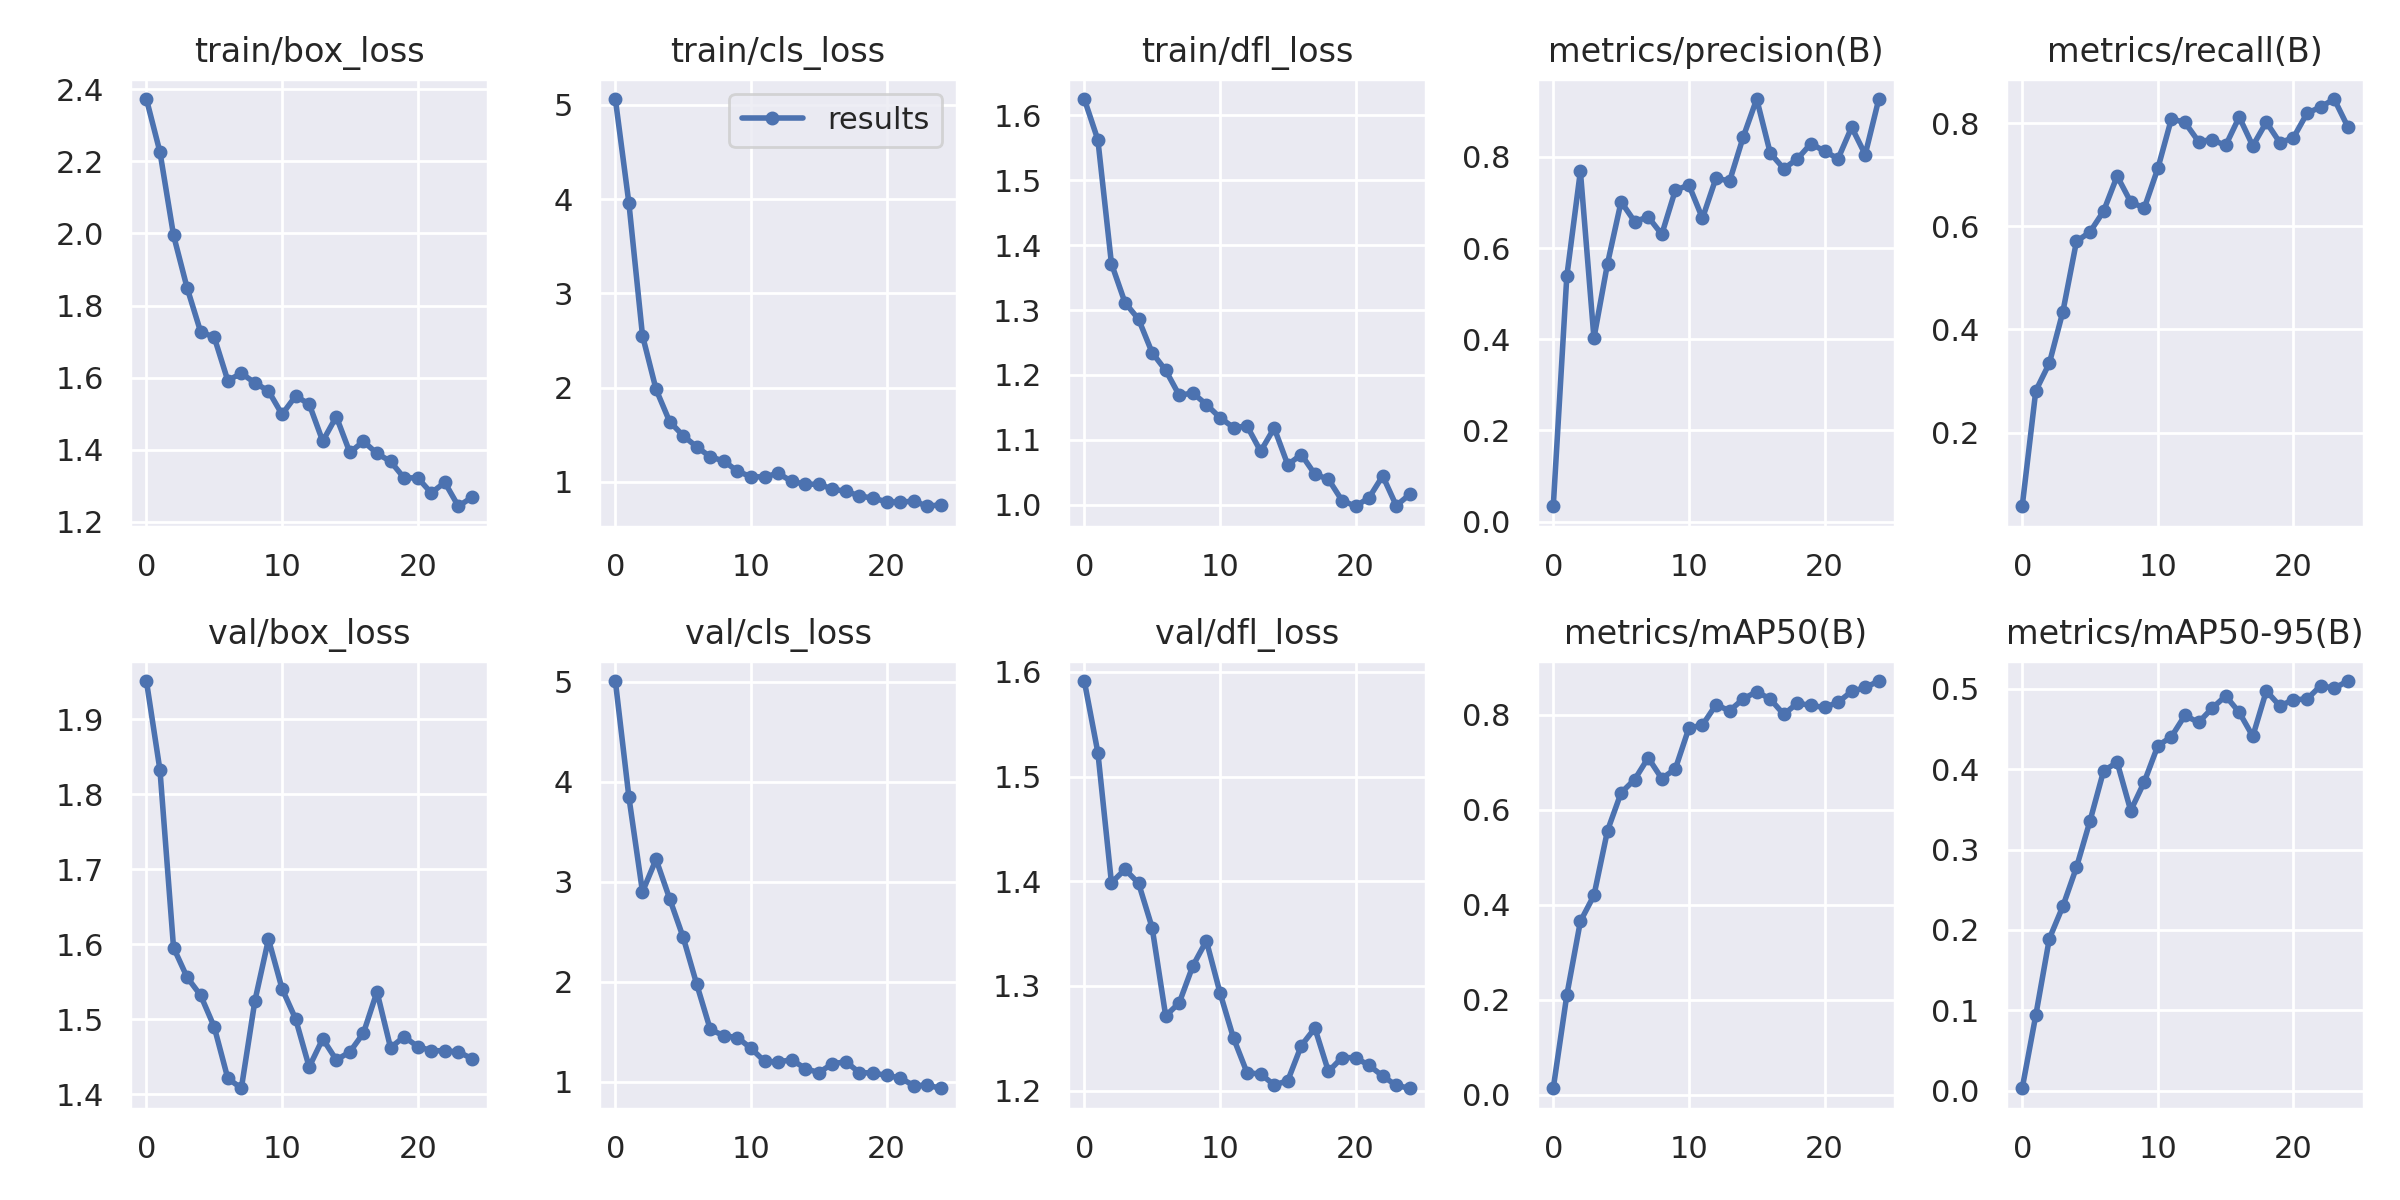

In [16]:
Image(filename='runs/detect/train2/results.png', width=600)

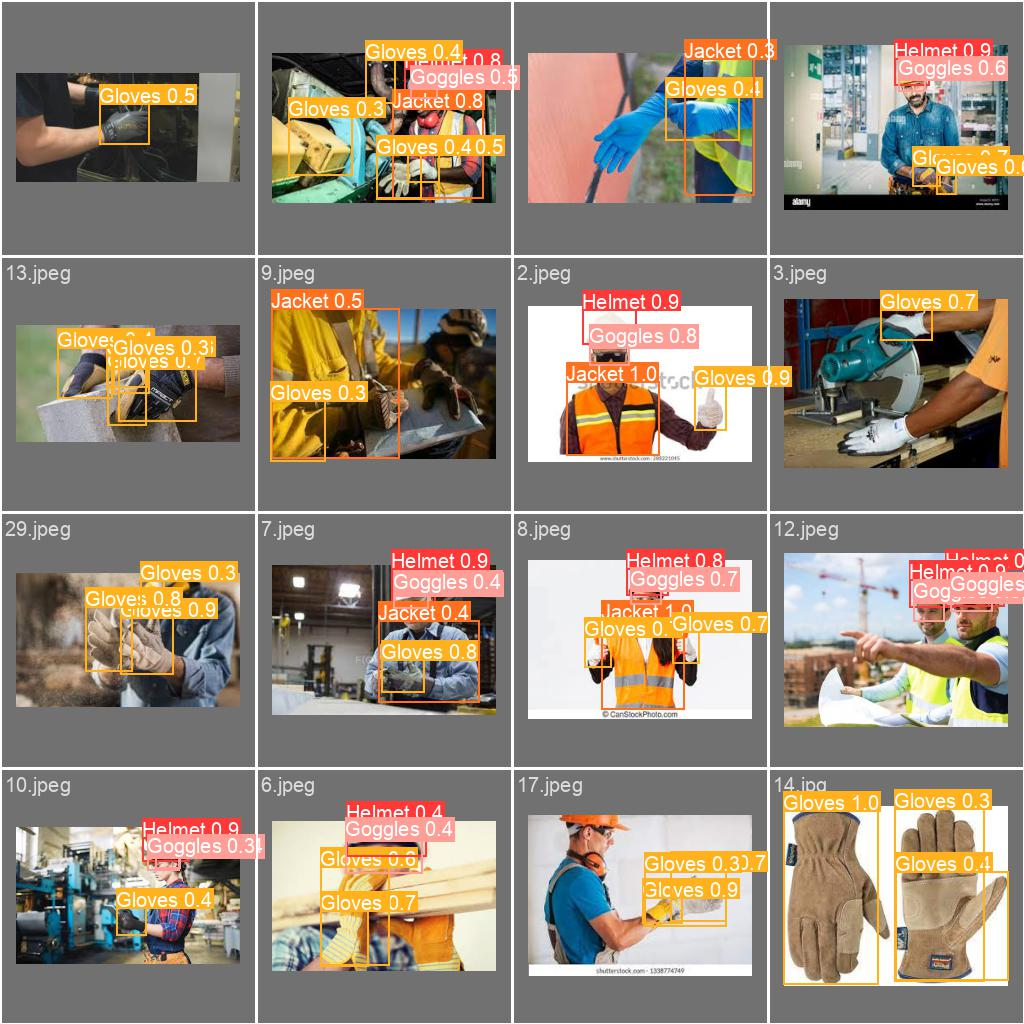

In [17]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

2023-06-14 08:51:42.508739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 08:51:43.401904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.34it/s]
                   all         31        101      0.899      0.803      0.867      0.501
                Helmet         31         18   

## Inference with Custom Model

In [19]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=data/test/images

2023-06-14 08:52:20.184484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 08:52:21.202027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/drive/MyDrive/yolov8/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 2 Glovess, 57.2ms
image 2/31 /content/drive/MyDrive/yolov8/data/test/images/10.jpeg: 160x224 3 Glovess, 55.5ms
image 3/31 /content/drive/MyDrive/yolov8/data/test/images/11.jpeg: 224x224 3 Glovess, 8.5ms
image 4/31 /content/drive/MyDrive/yolov8/data/test/images/12.jpeg: 192x224 3 Glovess, 8.7ms
image 

**NOTE:** Let's take a look at few results.

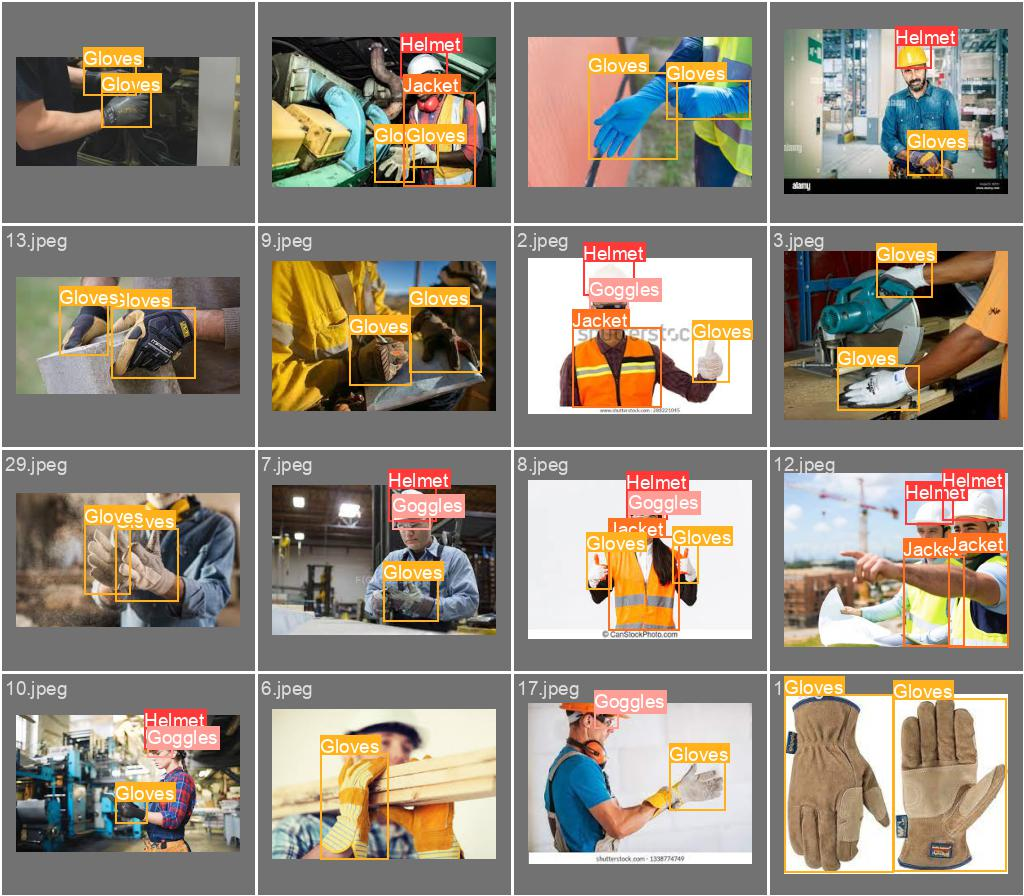

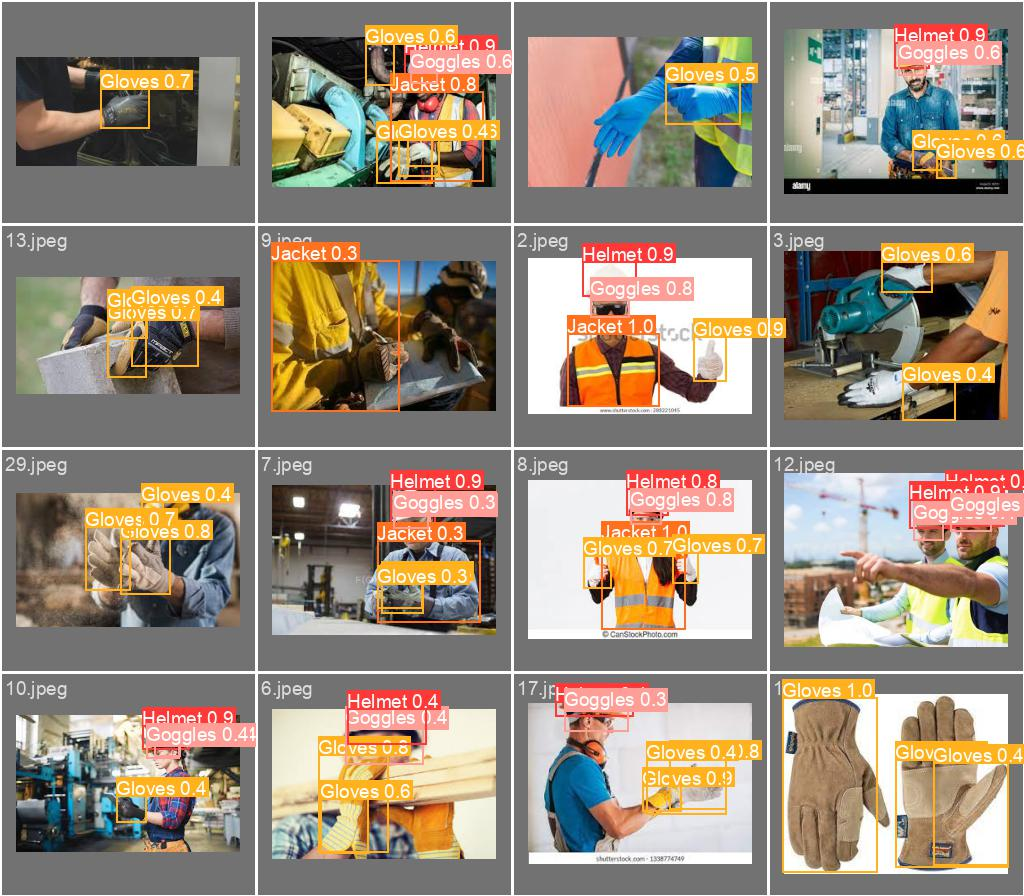

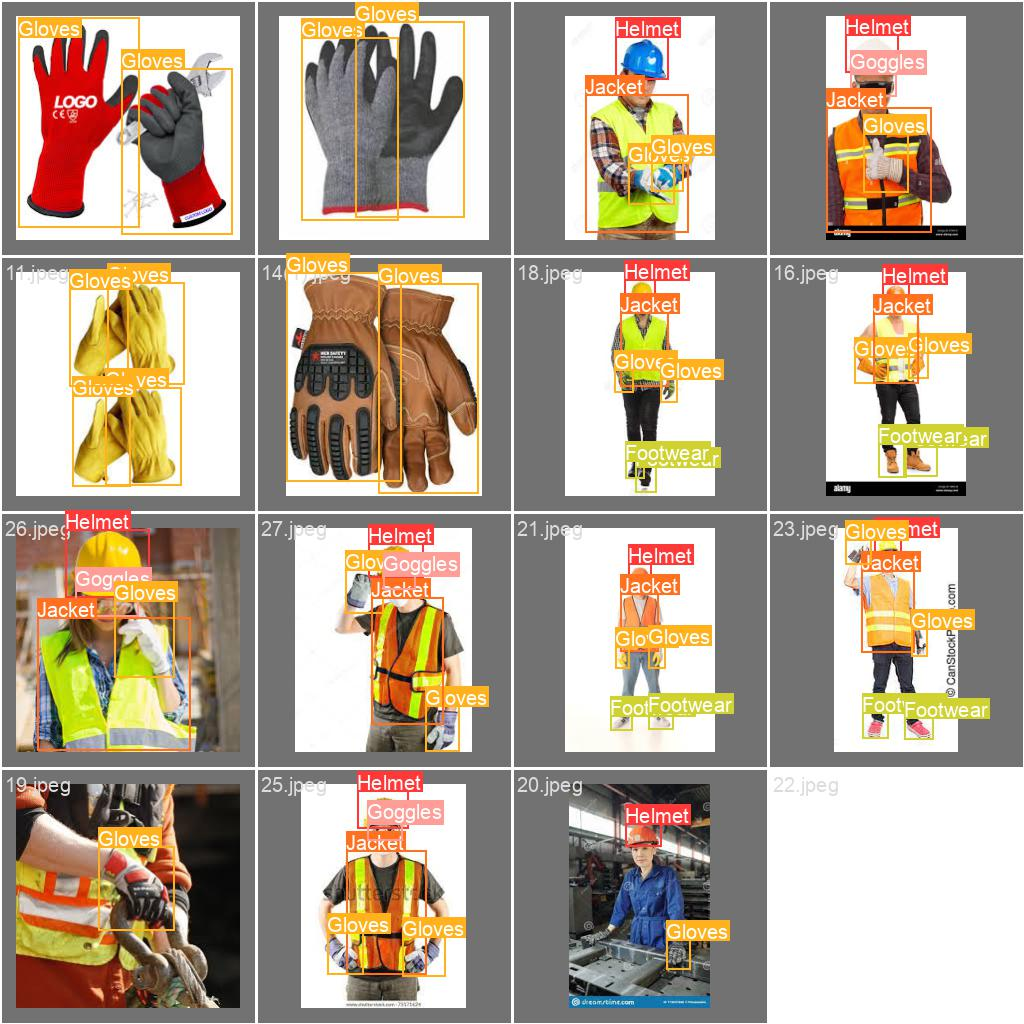

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/val/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")